In [ ]:
import pandas as pd
from body_measurement import BodyMeasurement
import random
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
base_path = "../segmentation_testing/test2/testB/"

In [4]:
subject_map_path = base_path + "subject_to_photo_map.csv"
mes_path = base_path + "measurements.csv"
metadata_path = base_path + "hwg_metadata.csv"

In [5]:
subject_df = pd.read_csv(subject_map_path)
mes_df = pd.read_csv(mes_path)
metadata_df = pd.read_csv(metadata_path)
images_path = base_path + 'mask/'

In [6]:
fin_df = mes_df.merge(subject_df, on='subject_id', how='left')
fin_df = fin_df.merge(metadata_df, on='subject_id', how='left')
fin_df = fin_df[fin_df["gender"] == "male"]
fin_df = fin_df.groupby('subject_id').apply(lambda x: x.iloc[random.randint(0, len(x)-1)]).reset_index(drop=True)
fin_df["image_path"] = "/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test2/train/mask/" + fin_df["photo_id"] + ".png"

/var/folders/2b/106xnqt95zj_l1lwlcqwj1p80000gn/T/ipykernel_27223/1576156269.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fin_df = fin_df.groupby('subject_id').apply(lambda x: x.iloc[random.randint(0, len(x)-1)]).reset_index(drop=True)


In [10]:
import torch
import json
import os
from tqdm import tqdm
import time

# Setup
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
output_dir = f"./testing/iter_testing/iter_{str(int(time.time()))}/"
os.makedirs(output_dir, exist_ok=True)

# Configure MPS if available
if torch.backends.mps.is_available():
    torch.device("mps")
    torch.mps.set_per_process_memory_fraction(0.7)

# Process all rows
all_results = {}
for idx, row in tqdm(fin_df.iterrows(), total=len(fin_df)):
    photo_id = row["photo_id"]
    result = {
        **BodyMeasurement(
            image_path=images_path + photo_id + ".png",
            height_cm=row["height"],
            is_silhouette=True
        ).execute(),
        "original_measurements": {
            "shoulder_width": row["shoulder-breadth"],
            "total_height": row["height"]
        }
    }
    
    with open(os.path.join(output_dir, f"{photo_id}.json"), 'w') as f:
        json.dump(result, f, indent=4)
    all_results[photo_id] = result

  0%|          | 0/24 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1733739425.378822 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733739425.552860 8490631 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739425.634875 8490634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739426.429913 8490633 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
  4%|▍         | 1/24 [00:01<00:28,  1.25s/it]I0000 00:00:1733739426.448980 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3


Body Measurements:
Shoulder Width: 45.1 cm
Torso Height: 86.5 cm
Chest Width: 40.6 cm


  8%|▊         | 2/24 [00:01<00:20,  1.07it/s]


Body Measurements:
Shoulder Width: 44.0 cm
Torso Height: 75.2 cm
Chest Width: 39.6 cm


I0000 00:00:1733739427.164626 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739427.275082 8490695 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739427.354270 8490697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 12%|█▎        | 3/24 [00:02<00:13,  1.53it/s]


Body Measurements:
Shoulder Width: 37.8 cm
Torso Height: 71.2 cm
Chest Width: 34.0 cm


I0000 00:00:1733739427.479203 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739427.573395 8490706 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739427.664455 8490710 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 17%|█▋        | 4/24 [00:03<00:14,  1.34it/s]


Body Measurements:
Shoulder Width: 40.6 cm
Torso Height: 70.8 cm
Chest Width: 36.5 cm


I0000 00:00:1733739428.378890 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739428.490526 8490729 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739428.596976 8490735 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 21%|██        | 5/24 [00:04<00:18,  1.01it/s]


Body Measurements:
Shoulder Width: 46.0 cm
Torso Height: 79.9 cm
Chest Width: 41.4 cm


I0000 00:00:1733739429.805388 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739429.962438 8490747 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739430.058931 8490752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 25%|██▌       | 6/24 [00:05<00:16,  1.11it/s]


Body Measurements:
Shoulder Width: 40.3 cm
Torso Height: 68.5 cm
Chest Width: 36.3 cm


I0000 00:00:1733739430.538914 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739430.670988 8490762 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739430.798393 8490762 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 29%|██▉       | 7/24 [00:06<00:16,  1.06it/s]


Body Measurements:
Shoulder Width: 52.7 cm
Torso Height: 92.7 cm
Chest Width: 47.5 cm


I0000 00:00:1733739431.571735 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739431.673683 8490775 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739431.756070 8490782 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 33%|███▎      | 8/24 [00:06<00:12,  1.32it/s]


Body Measurements:
Shoulder Width: 43.7 cm
Torso Height: 74.9 cm
Chest Width: 39.4 cm


I0000 00:00:1733739431.930638 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739432.060589 8490787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739432.175669 8490789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 38%|███▊      | 9/24 [00:07<00:09,  1.54it/s]I0000 00:00:1733739432.337737 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 40.3 cm
Torso Height: 74.7 cm
Chest Width: 36.3 cm


W0000 00:00:1733739432.492457 8490795 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739432.617094 8490795 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 42%|████▏     | 10/24 [00:08<00:11,  1.26it/s]


Body Measurements:
Shoulder Width: 45.5 cm
Torso Height: 84.8 cm
Chest Width: 41.0 cm


I0000 00:00:1733739433.456033 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739433.569423 8490811 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739433.659300 8490814 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 46%|████▌     | 11/24 [00:08<00:09,  1.31it/s]


Body Measurements:
Shoulder Width: 44.0 cm
Torso Height: 77.0 cm
Chest Width: 39.6 cm


I0000 00:00:1733739434.149658 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739434.272301 8490823 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739434.411273 8490822 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 50%|█████     | 12/24 [00:09<00:07,  1.52it/s]I0000 00:00:1733739434.577719 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 37.6 cm
Torso Height: 71.5 cm
Chest Width: 33.8 cm


W0000 00:00:1733739434.726663 8490836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739434.850055 8490838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 54%|█████▍    | 13/24 [00:09<00:06,  1.69it/s]I0000 00:00:1733739434.999632 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 37.0 cm
Torso Height: 70.1 cm
Chest Width: 33.3 cm


W0000 00:00:1733739435.137952 8490845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739435.261080 8490845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 58%|█████▊    | 14/24 [00:10<00:05,  1.88it/s]I0000 00:00:1733739435.400524 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 41.8 cm
Torso Height: 76.3 cm
Chest Width: 37.6 cm


W0000 00:00:1733739435.520291 8490855 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739435.612861 8490856 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 62%|██████▎   | 15/24 [00:11<00:08,  1.12it/s]


Body Measurements:
Shoulder Width: 51.8 cm
Torso Height: 92.1 cm
Chest Width: 46.6 cm


I0000 00:00:1733739437.138542 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739437.271878 8490883 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739437.369129 8490886 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 67%|██████▋   | 16/24 [00:13<00:08,  1.02s/it]


Body Measurements:
Shoulder Width: 46.0 cm
Torso Height: 83.0 cm
Chest Width: 41.4 cm


I0000 00:00:1733739438.455053 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739438.582211 8490913 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739438.690393 8490913 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 71%|███████   | 17/24 [00:14<00:08,  1.21s/it]


Body Measurements:
Shoulder Width: 52.0 cm
Torso Height: 89.7 cm
Chest Width: 46.8 cm


I0000 00:00:1733739440.094316 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739440.208139 8490946 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739440.295049 8490945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 75%|███████▌  | 18/24 [00:15<00:05,  1.05it/s]I0000 00:00:1733739440.458455 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 52.5 cm
Torso Height: 90.0 cm
Chest Width: 47.3 cm


W0000 00:00:1733739440.568857 8490965 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739440.646097 8490965 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 79%|███████▉  | 19/24 [00:17<00:06,  1.21s/it]


Body Measurements:
Shoulder Width: 42.2 cm
Torso Height: 72.5 cm
Chest Width: 38.0 cm


I0000 00:00:1733739442.255456 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739442.374047 8491004 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739442.452405 8491004 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 83%|████████▎ | 20/24 [00:18<00:05,  1.36s/it]


Body Measurements:
Shoulder Width: 47.0 cm
Torso Height: 86.1 cm
Chest Width: 42.3 cm


I0000 00:00:1733739443.972594 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739444.095141 8491042 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739444.202162 8491042 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 88%|████████▊ | 21/24 [00:19<00:03,  1.19s/it]


Body Measurements:
Shoulder Width: 44.3 cm
Torso Height: 77.7 cm
Chest Width: 39.9 cm


I0000 00:00:1733739444.773565 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739444.911898 8491051 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739445.055115 8491052 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 92%|█████████▏| 22/24 [00:20<00:02,  1.13s/it]


Body Measurements:
Shoulder Width: 45.7 cm
Torso Height: 81.6 cm
Chest Width: 41.1 cm


I0000 00:00:1733739445.750392 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739445.869163 8491072 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739445.963802 8491072 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 96%|█████████▌| 23/24 [00:21<00:01,  1.00s/it]


Body Measurements:
Shoulder Width: 41.6 cm
Torso Height: 76.3 cm
Chest Width: 37.4 cm


I0000 00:00:1733739446.455177 8490209 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733739446.571721 8491080 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733739446.696379 8491080 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|██████████| 24/24 [00:21<00:00,  1.11it/s]


Body Measurements:
Shoulder Width: 41.5 cm
Torso Height: 77.5 cm
Chest Width: 37.4 cm


In [20]:
import os
import json
import numpy as np

data_dir = "./testing/iter_testing/iter_1733739130/"
ans = {}

for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as f:
            ans[filename.replace('.json', '')] = json.load(f)

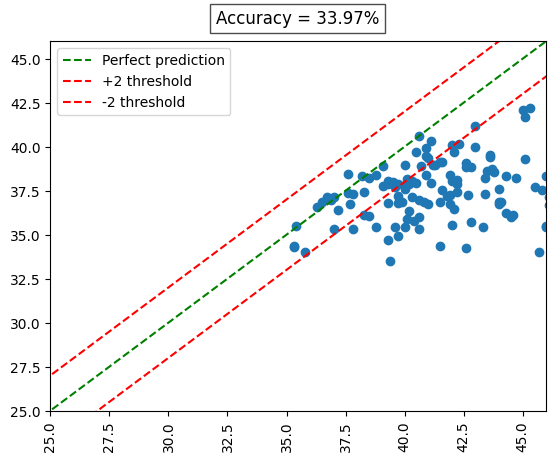

Accuracy = 33.97435897435898%


In [21]:
import matplotlib.pyplot as plt

treshold = 2.5

photo_ids = []
for photo_id, val in ans.items():
    if ("shoulder_width" in ans[photo_id]):
        photo_ids.append(photo_id)
predict_vals = [ans[photo_id]["shoulder_width"] for photo_id in photo_ids]
actual_val = [ans[photo_id]["original_measurements"]["shoulder_width"] for photo_id in photo_ids]

good = 0
for a,b in zip(predict_vals, actual_val):
    c = abs(a - b)
    if (c <= treshold and c >= -treshold):
        good += 1
accuracy = good / len(photo_ids)

plt.scatter(predict_vals, actual_val)
line_range = np.linspace(20, 50, 100)
plt.plot(line_range, line_range, '--', color='green', label='Perfect prediction')
plt.plot(line_range, line_range + 2, '--', color='red', label='+2 threshold')
plt.plot(line_range, line_range - 2, '--', color='red', label='-2 threshold')
plt.xlim(25, 46)
plt.ylim(25, 46)
plt.text(32, 47, f'Accuracy = {round(accuracy*100, 2)}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xticks(rotation=90)
plt.legend()
plt.show()


print(f"Accuracy = {accuracy * 100}%")

In [22]:
import sys
sys.path.append('..')
from utils import *

In [25]:
r2_threshold(np.array(predict_vals), np.array(actual_val))

(-1.347326719433601, 23.717948717948715)

In [26]:
rmse_threshold(np.array(predict_vals), np.array(actual_val))

(7.09410495325785, 23.717948717948715)

In [27]:
mae_threshold(np.array(predict_vals), np.array(actual_val))

(5.549066959283291, 23.717948717948715)